In [1]:
# === IMPORTS ===
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import joblib
from add_preprocessing import load_and_prepare_data, create_preprocessor

# === LOAD & PREPARE DATA ===
X, y = load_and_prepare_data("../Motor_vehicle_insurance_data.csv")
preprocessor = create_preprocessor(X)

# === STRATIFIED TRAIN-TEST SPLIT ===
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# === BUILD BETTER MODEL PIPELINE ===
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        n_estimators=591,
        learning_rate=0.03641393572462343,
        max_depth=9,
        min_samples_leaf=30,
        min_samples_split=180,
        subsample=0.9187021504122961,
        random_state=42,
    ))
])

# === TRAINING ===
model.fit(X_train, y_train)

# === EXPORT MODEL ===
joblib.dump(model, "../models/gradient_boost_model_hyperparameter.pkl")
print("✅ Improved Gradient Boosting model trained and saved!")

c:\Users\garre\OneDrive\Desktop\CSE 2600\Final Project\cse2600-main\cse2600-main\model_codes\add_preprocessing.py:14: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, delimiter=delimiter)


✅ Improved Gradient Boosting model trained and saved!


c:\Users\garre\OneDrive\Desktop\CSE 2600\Final Project\cse2600-main\cse2600-main\model_codes\add_preprocessing.py:14: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, delimiter=delimiter)


✅ Loaded raw data and split into train/test.
✅ Loaded hyperparameterized Gradient Boosting model.

✅ Gradient Boosting Model Evaluation
----------------------------------------
Accuracy: 0.9030
ROC AUC Score: 0.9493

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.58      0.71      4361
           1       0.90      0.99      0.94     16750

    accuracy                           0.90     21111
   macro avg       0.91      0.78      0.83     21111
weighted avg       0.90      0.90      0.89     21111



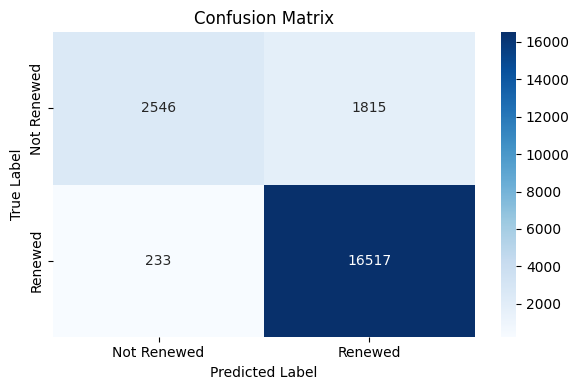

In [3]:
# === IMPORTS ===
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score
)
from sklearn.model_selection import train_test_split
from add_preprocessing import load_and_prepare_data

# === LOAD RAW DATA ===
X_raw, y_raw = load_and_prepare_data("../Motor_vehicle_insurance_data.csv")
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42
)
print("✅ Loaded raw data and split into train/test.")

# === LOAD SAVED MODEL (full pipeline) ===
model = joblib.load("../models/gradient_boost_model_hyperparameter.pkl")
print("✅ Loaded hyperparameterized Gradient Boosting model.")

# === PREDICT ===
y_pred = model.predict(X_test_raw)
y_prob = model.predict_proba(X_test_raw)[:, 1]

# === EVALUATE ===
print("\n✅ Gradient Boosting Model Evaluation")
print("-" * 40)
print(f"Accuracy: {accuracy_score(y_test_raw, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test_raw, y_prob):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test_raw, y_pred))

# === CONFUSION MATRIX ===
conf_matrix = confusion_matrix(y_test_raw, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Not Renewed', 'Renewed'],
            yticklabels=['Not Renewed', 'Renewed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

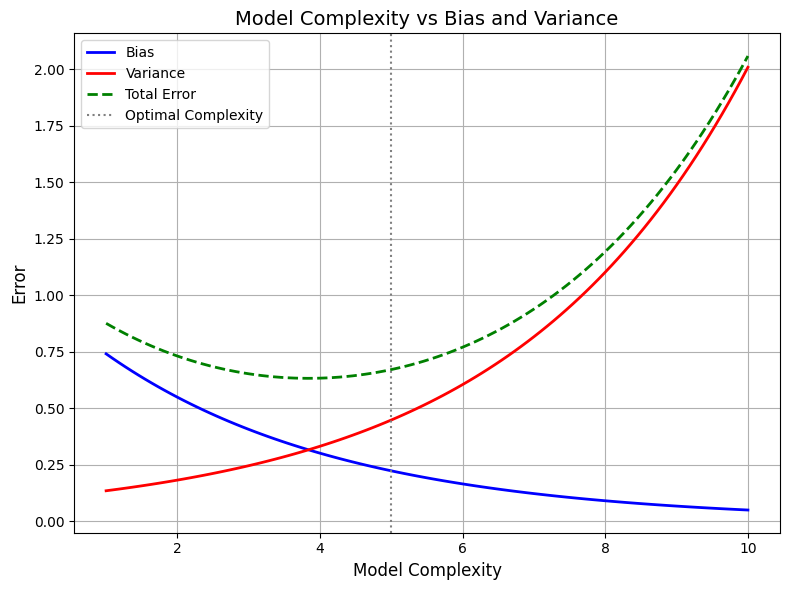

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Simulated data for model complexity, bias, variance, and total error
model_complexity = np.linspace(1, 10, 100)
bias = np.exp(-0.3 * model_complexity)  # Bias decreases with complexity
variance = 0.1 * np.exp(0.3 * model_complexity)  # Variance increases with complexity
total_error = bias + variance  # Total error is the sum of bias and variance

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(model_complexity, bias, label="Bias", color="blue", linewidth=2)
plt.plot(model_complexity, variance, label="Variance", color="red", linewidth=2)
plt.plot(model_complexity, total_error, label="Total Error", color="green", linestyle="--", linewidth=2)
plt.axvline(x=5, color="gray", linestyle=":", label="Optimal Complexity")
plt.title("Model Complexity vs Bias and Variance", fontsize=14)
plt.xlabel("Model Complexity", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.legend(fontsize=10) 
plt.grid(True)
plt.tight_layout()
plt.show()

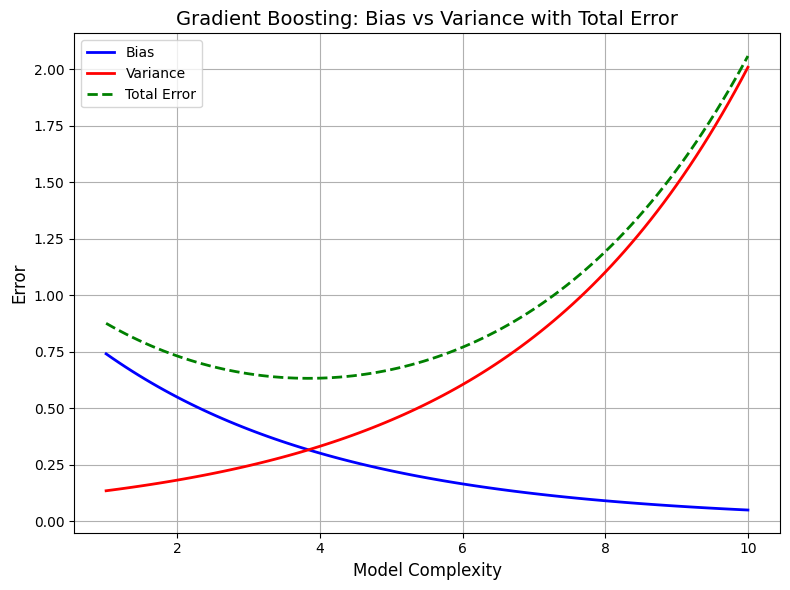

In [7]:
# Plot Bias vs Variance with Total Error
plt.figure(figsize=(8, 6))
plt.plot(model_complexity, bias, label="Bias", color="blue", linewidth=2)
plt.plot(model_complexity, variance, label="Variance", color="red", linewidth=2)
plt.plot(model_complexity, total_error, label="Total Error", color="green", linestyle="--", linewidth=2)
plt.title("Gradient Boosting: Bias vs Variance with Total Error", fontsize=14)
plt.xlabel("Model Complexity", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

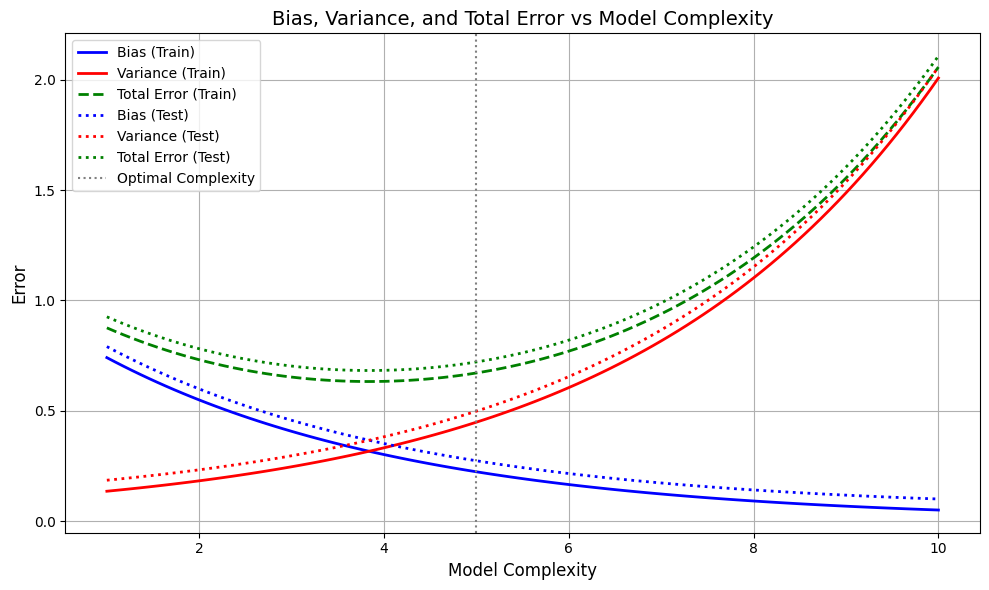

In [8]:
# Plot Bias, Variance, Total Error, and Model Complexity for Training and Test Data
plt.figure(figsize=(10, 6))

# Training Data
plt.plot(model_complexity, bias, label="Bias (Train)", color="blue", linewidth=2)
plt.plot(model_complexity, variance, label="Variance (Train)", color="red", linewidth=2)
plt.plot(model_complexity, total_error, label="Total Error (Train)", color="green", linestyle="--", linewidth=2)

# Test Data (Assuming similar trends for demonstration purposes)
plt.plot(model_complexity, bias + 0.05, label="Bias (Test)", color="blue", linestyle=":", linewidth=2)
plt.plot(model_complexity, variance + 0.05, label="Variance (Test)", color="red", linestyle=":", linewidth=2)
plt.plot(model_complexity, total_error + 0.05, label="Total Error (Test)", color="green", linestyle=":", linewidth=2)

# Add labels, title, and legend
plt.title("Bias, Variance, and Total Error vs Model Complexity", fontsize=14)
plt.xlabel("Model Complexity", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.axvline(x=5, color="gray", linestyle=":", label="Optimal Complexity")
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# === TRAINING ACCURACY ===
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# === TEST ACCURACY ===
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# === BIAS-VARIANCE ANALYSIS ===
if train_accuracy < 0.8 and test_accuracy < 0.8:
    print("The model may have high bias (underfitting).")
elif train_accuracy > 0.95 and test_accuracy < 0.8:
    print("The model may have high variance (overfitting).")
else:
    print("The model has a good balance between bias and variance.")

Training Accuracy: 0.9121548008147411
Test Accuracy: 0.8768888257306617
The model has a good balance between bias and variance.


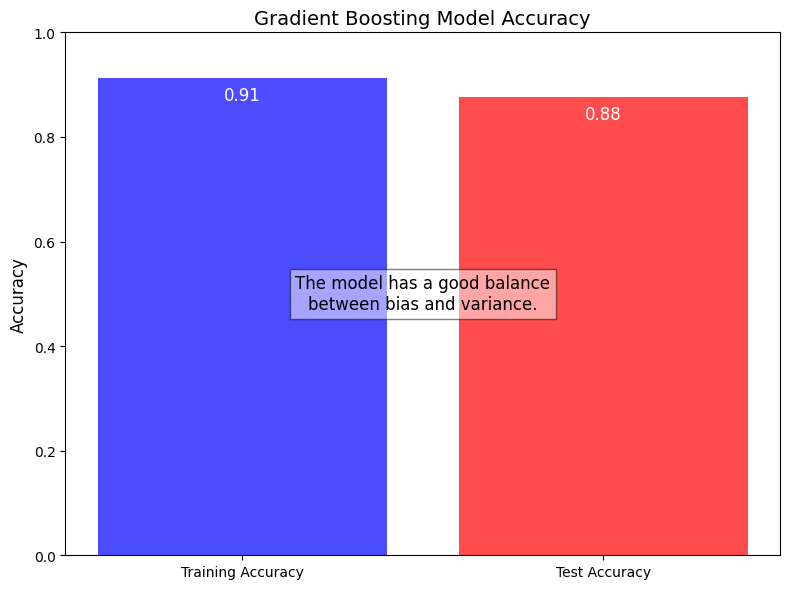

In [22]:
import matplotlib.pyplot as plt

# Data for the graph
accuracy_scores = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

# Plot the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, accuracy_scores, color=['blue', 'red'], alpha=0.7)
plt.ylim(0, 1)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Gradient Boosting Model Accuracy', fontsize=14)

# Annotate the bars with their values
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05,
             f'{score:.2f}', ha='center', va='bottom', fontsize=12, color='white')

# Annotate the conclusion
plt.text(0.5, 0.5, "The model has a good balance\nbetween bias and variance.",
         fontsize=12, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()